In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/MyDrive/Data/Temp_Provincias.csv', sep=';', decimal='.')

In [4]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,01/01/2018,Madrid,11.6,3.6
1,02/01/2018,Madrid,13.4,7.5
2,03/01/2018,Madrid,13.5,7.6
3,04/01/2018,Madrid,13.7,7.8
4,05/01/2018,Madrid,11.5,5.8


In [5]:
df.FECHA=pd.to_datetime(df.FECHA, format="%d/%m/%Y")

In [6]:
df.set_index('FECHA').resample('W')

In [7]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,2018-01-01,Madrid,11.6,3.6
1,2018-01-02,Madrid,13.4,7.5
2,2018-01-03,Madrid,13.5,7.6
3,2018-01-04,Madrid,13.7,7.8
4,2018-01-05,Madrid,11.5,5.8


In [8]:
df.columns

Index(['FECHA', 'Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [9]:
df = df.set_index('FECHA')
df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Madrid,11.6,3.6
2018-01-02,Madrid,13.4,7.5
2018-01-03,Madrid,13.5,7.6
2018-01-04,Madrid,13.7,7.8
2018-01-05,Madrid,11.5,5.8


In [10]:
madrid_df = df[df["Provincia"] == "Madrid"]
madrid_df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Madrid,11.6,3.6
2018-01-02,Madrid,13.4,7.5
2018-01-03,Madrid,13.5,7.6
2018-01-04,Madrid,13.7,7.8
2018-01-05,Madrid,11.5,5.8


In [11]:
madrid_df.columns

Index(['Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [12]:
madrid_df['Temp_Media'] = madrid_df[['T. Máxima','T.Mínima']].mean(axis=1)
madrid_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Madrid,11.6,3.6,7.60
2018-01-02,Madrid,13.4,7.5,10.45
2018-01-03,Madrid,13.5,7.6,10.55
2018-01-04,Madrid,13.7,7.8,10.75
2018-01-05,Madrid,11.5,5.8,8.65


In [13]:
madrid_df.head()

,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Madrid,11.6,3.6,7.60
2018-01-02,Madrid,13.4,7.5,10.45
2018-01-03,Madrid,13.5,7.6,10.55
2018-01-04,Madrid,13.7,7.8,10.75
2018-01-05,Madrid,11.5,5.8,8.65


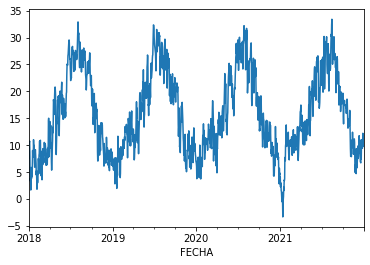

In [14]:
madrid_df['Temp_Media'].plot()

In [15]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':madrid_df.index,'y':madrid_df.Temp_Media})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
FECHA,,
2018-01-01,2018-01-01,7.60
2018-01-02,2018-01-02,10.45
2018-01-03,2018-01-03,10.55
2018-01-04,2018-01-04,10.75
2018-01-05,2018-01-05,8.65


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


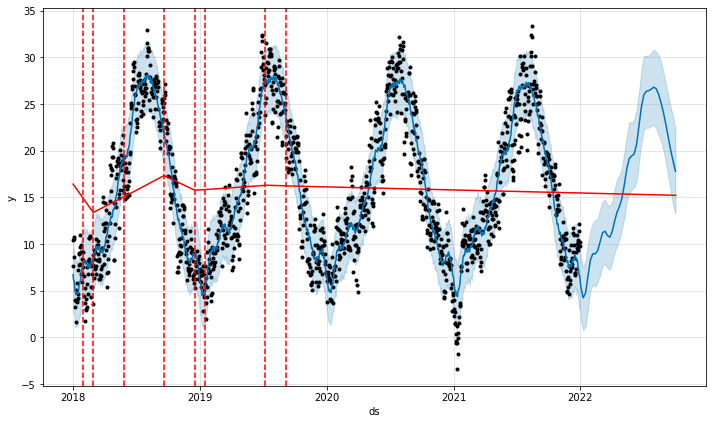

In [16]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=40, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [17]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,6.720349,3.376022,10.299436
1,2018-01-02,6.211364,2.605702,9.326649
2,2018-01-03,6.128456,2.609614,9.581983
3,2018-01-04,6.036997,2.587349,9.175479
4,2018-01-05,5.760559,2.266009,9.045328


In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1496,2022-09-04,15.247928,18.754251,27.223314,12.590747,18.035796,7.638603,7.638603,7.638603,-0.038663,-0.038663,-0.038663,7.677266,7.677266,7.677266,0.0,0.0,0.0,22.886531
1497,2022-09-11,15.241653,17.264843,25.859917,12.506839,18.140352,6.225829,6.225829,6.225829,-0.038663,-0.038663,-0.038663,6.264493,6.264493,6.264493,0.0,0.0,0.0,21.467482
1498,2022-09-18,15.235377,15.717161,24.714663,12.388287,18.257741,4.846007,4.846007,4.846007,-0.038663,-0.038663,-0.038663,4.884670,4.884670,4.884670,0.0,0.0,0.0,20.081383
1499,2022-09-25,15.229101,14.149860,23.694528,12.246857,18.363225,3.676050,3.676050,3.676050,-0.038663,-0.038663,-0.038663,3.714713,3.714713,3.714713,0.0,0.0,0.0,18.905151
1500,2022-10-02,15.222825,13.230974,22.209004,12.097079,18.468621,2.564958,2.564958,2.564958,-0.038663,-0.038663,-0.038663,2.603622,2.603622,2.603622,0.0,0.0,0.0,17.787784


In [19]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('temp_madrid.csv',  index=False, sep=";", decimal=",")